# Jupyter Data Science Workflow
## From exploratory analysis to reproducible science

*A.BOUBEKRI*

# # Part 1: Loading and Visualizing Data
_Use the Jupyter notebook to download and visualize the dataset_.

In [1]:
import os
import pandas as pd
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing data set.
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"
urlretrieve(URL, "Fremont.csv")

('Fremont.csv', <http.client.HTTPMessage at 0x229b667a9c8>)

In [3]:
# Checking head of dataset 'Fremont.csv'.
data = pd.read_csv("Fremont.csv", index_col="Date", parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


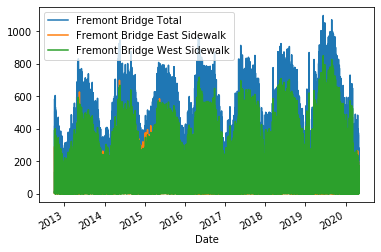

In [4]:
# Plotting data.
data.plot()

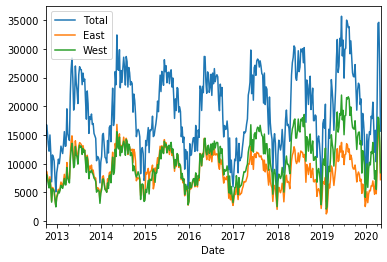

In [5]:
# Better viz.
data.columns = ['Total', 'East', 'West']
data.resample("W").sum().plot()

# # Part 2: Further Data Exploration
_More sophisticated visualization with the data, using matplotlib and pandas._

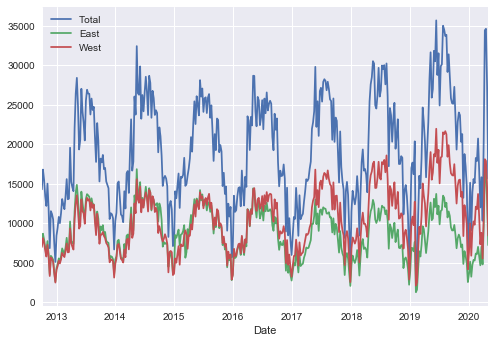

In [6]:
# Changing style of viz.
plt.style.use('seaborn')
data.resample("W").sum().plot()

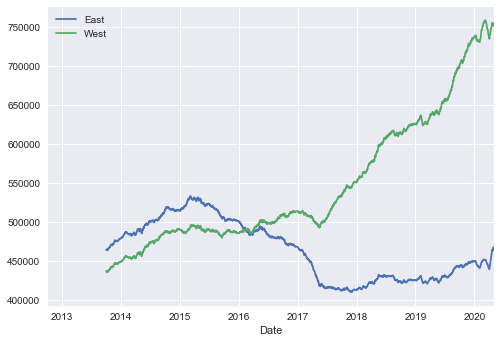

In [7]:
# Comparing East with West regions.
data[['East', 'West']].resample('D').sum().rolling(365).sum().plot()

(0, 1263137.8)

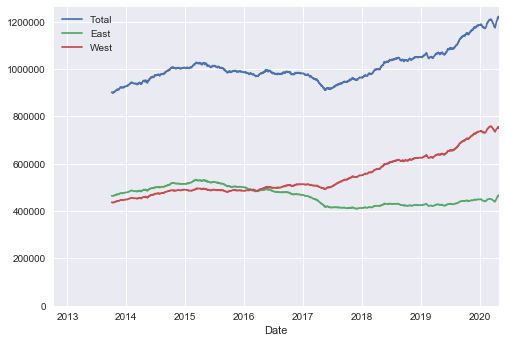

In [8]:
# More focus.
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

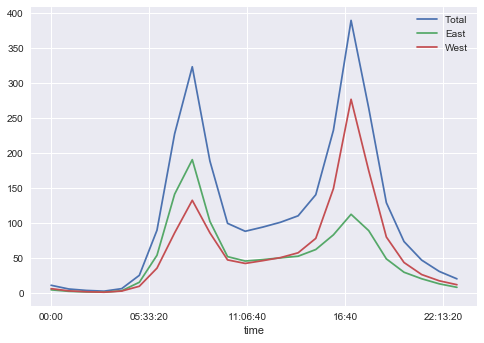

In [9]:
# Time spent between different regions.
data.groupby(data.index.time).mean().plot()

In [10]:
# Pivoting date and time.
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


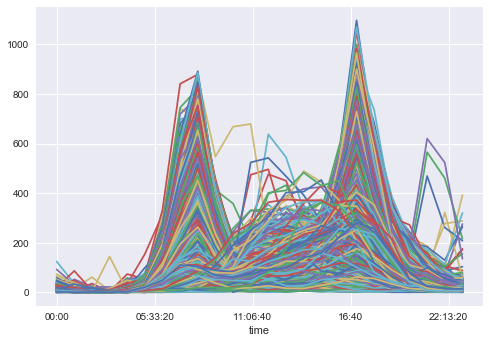

In [11]:
# Plot result.
pivoted.plot(legend=False)

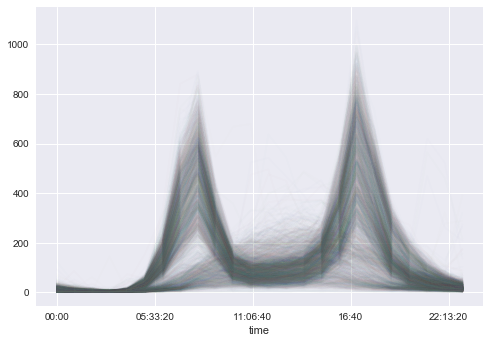

In [12]:
# More refinement.
pivoted.plot(legend=False, alpha=0.01)

# # Part 3: Creating a function that check data download utility
_Check Data: Download and cache fremont data._

In [13]:
FREMONT_URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"
def check_fremont_data(filename="Fremont.csv", url=FREMONT_URL, force_download=False):

    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv("Fremont.csv", index_col="Date", parse_dates=True)
    data.columns = ['Total', 'East', 'West']

    return data


In [14]:
# Checking head of dataset 'Fremont.csv'.
data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


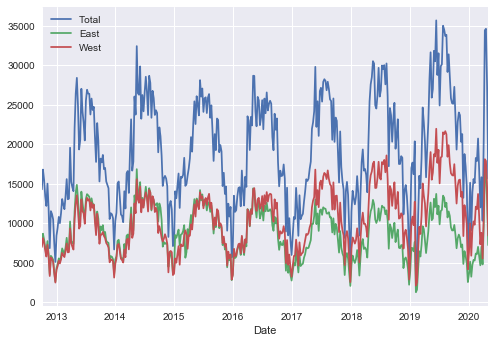

In [15]:
data.resample("W").sum().plot()

(0, 1263137.8)

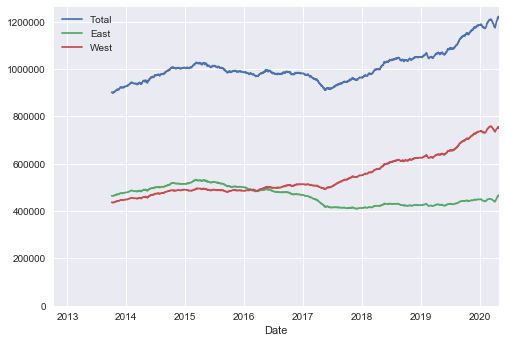

In [16]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

In [17]:
# Pivoting date and time.
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


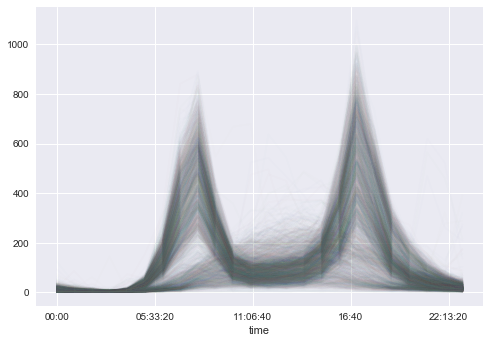

In [18]:
# Plotting result.
pivoted.plot(legend=False, alpha=0.01)

# # Part 4: Creating a Python Package
_Move the data download utility into separate package._

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [20]:
from jupyterworkflow.data import check_fremont_data

In [21]:
data = check_fremont_data()
data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


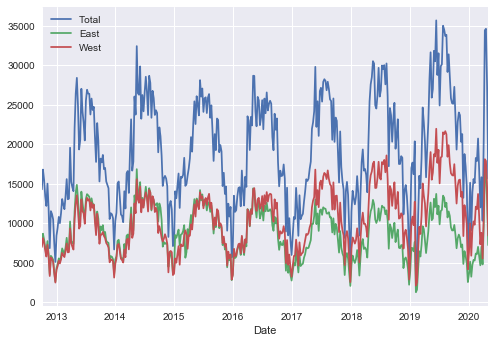

In [22]:
data.resample("W").sum().plot()

(0, 1263137.8)

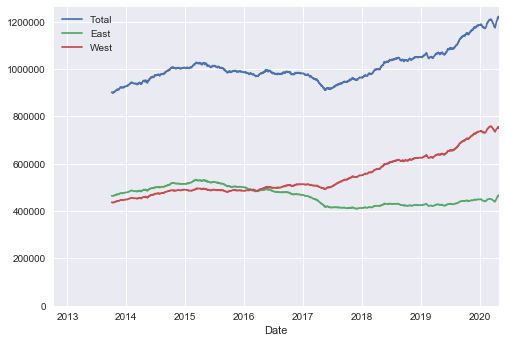

In [23]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

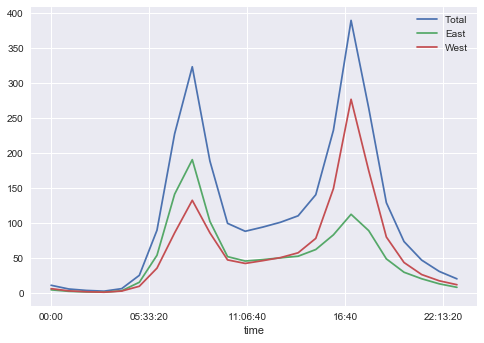

In [24]:
data.groupby(data.index.time).mean().plot()

In [25]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


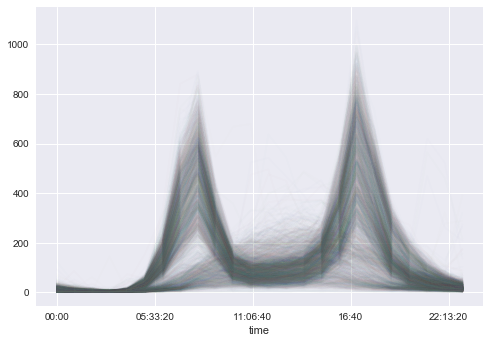

In [26]:
pivoted.plot(legend=False, alpha=0.01)

In [27]:
check_fremont_data?

In [28]:
check_fremont_data??

# # Part 5: Unit Testing with PyTest
_Unit tests for the data download utility._

The function check_fremont_data() runs slowly:

![time_data1](jupyterworkflow/tests/time_test1.PNG)

# # Part 6: Refactoring for Speed
_Refactoring the data download function to be faster._

After refactoring the code, data download function got a little bit fast.
![time_data2](jupyterworkflow/tests/time_test2.PNG)

# # Part 7: Further Data Exploration: PCA and GMM
_Applying unsupervised learning techniques to the data to explore what we can learn from ._

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

plt.style.use('seaborn')
%matplotlib inline

### Get Data

In [ ]:
from jupyterworkflow.data import check_fremont_data

data = check_fremont_data()
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

### Principal Component Analysis (PCA)

In [ ]:
X = pivoted.fillna(0).T.values
X.shape

In [ ]:
X2 = PCA(2).fit_transform(X)
X2.shape

In [ ]:
plt.scatter(X2[:, 0], X2[:, 1])

### Unsupervised Clustering

In [ ]:
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)

In [ ]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1])
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0])

ax[0].set_title('Red Cluster')
ax[1].set_title('Purple Cluster')

### Comparing with Day Of Week

In [ ]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

### Analyzing Outliers
The following points are weekdays with a holiday-like pattern

In [ ]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 0) & (dayofweek < 5)]